In [73]:
import pandas as pd
import numpy as np
import re
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kanoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
data = pd.read_csv("spamcall.csv", encoding='ISO-8859-1')
spam = pd.DataFrame(data)

In [79]:
spam.rename(columns={spam.columns[0]: 'label', spam.columns[1]: 'message'}, inplace=True)

In [81]:
spam['label_num'] = np.where(spam['label'].str.lower() == 'fraud', 1, 0)

In [83]:
print("Class distribution:\n", spam['label'].value_counts())

Class distribution:
 label
normal    5287
fraud      638
Name: count, dtype: int64


In [85]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

corpus = []
for msg in spam['message']:
    # Keep only letters
    review = re.sub('[^a-zA-Z]', ' ', str(msg))
    review = review.lower()
    review = review.split()
    # Remove stopwords and apply stemming
    review = [ps.stem(word) for word in review if word not in stop_words]
    corpus.append(' '.join(review))


In [87]:
cv = CountVectorizer(max_features=4000)
X = cv.fit_transform(corpus).toarray()
Y = spam['label_num'].values

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [91]:
svm_model = SVC(kernel='linear', probability=True, class_weight='balanced')
svm_model.fit(X_train, Y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [93]:
pred = svm_model.predict(X_test)


In [95]:
print("\n===== SVM MODEL EVALUATION =====")
print("Accuracy:", accuracy_score(Y_test, pred))
print("\nClassification Report:\n", classification_report(Y_test, pred))


===== SVM MODEL EVALUATION =====
Accuracy: 0.9713080168776371

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1057
           1       0.87      0.87      0.87       128

    accuracy                           0.97      1185
   macro avg       0.93      0.93      0.93      1185
weighted avg       0.97      0.97      0.97      1185



In [97]:
cm = confusion_matrix(Y_test, pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[1040   17]
 [  17  111]]


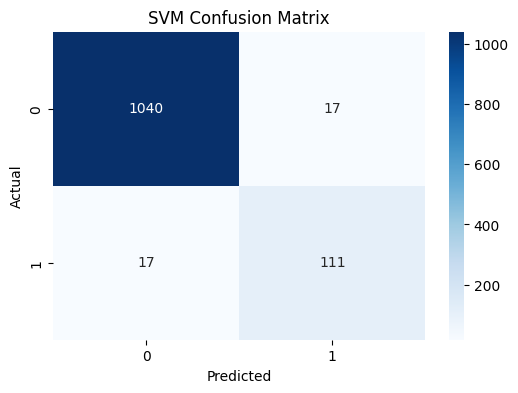

In [99]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

In [101]:
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(cv, "svc_cv.pkl")
print("✅ Model and vectorizer saved as 'svm_model.pkl' and 'svc_cv.pkl'")

✅ Model and vectorizer saved as 'svm_model.pkl' and 'svc_cv.pkl'
